# Wczytanie bibliotek

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
import seaborn as sns
%matplotlib inline

### Zadanie: małe cyfry vs duże, drzewa decyzyjne i lasy losowe

Dla danych digits zbuduj modele drzew decyzyjnych i lasów losowych
 rozróżniające małe cyfry od dużych:

1. Oddziel zbiór testowy

2. Przeskaluj dane i policz średnią dokładność za pomocą kroswalidacji dla modeli:

    pełne drzewo decyzyjne
    
    dzewa decyzyjne o głębokości 5 i 10
    
    lasy losowe n_estimators = 100
    
    lasy losowe n_estimators = 100, max_depth = 7
    
    lasy losowe n_estimators = 200
    
3. Porównaj wyniki, wybierz najlepszy model i policz dokładność dla zbioru testowego.

In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
y = (y > 4).astype(int)

# Skalowanie danych i oddzielenie zbioru testowego

In [5]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [6]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 640x480 with 0 Axes>

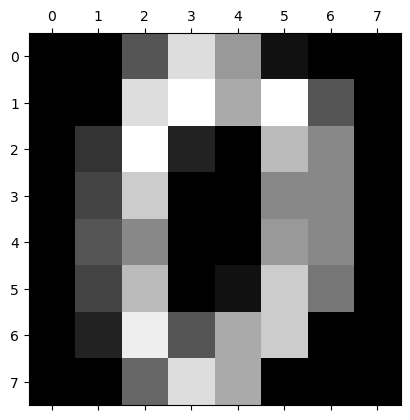

In [7]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [8]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [9]:
from sklearn.preprocessing import scale

In [10]:
data = scale(X)


In [11]:
data[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [12]:
data.shape

(1797, 64)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 17)

# Pełne drzewo decyzyjne

In [14]:
model1 = DecisionTreeClassifier(random_state = 17)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

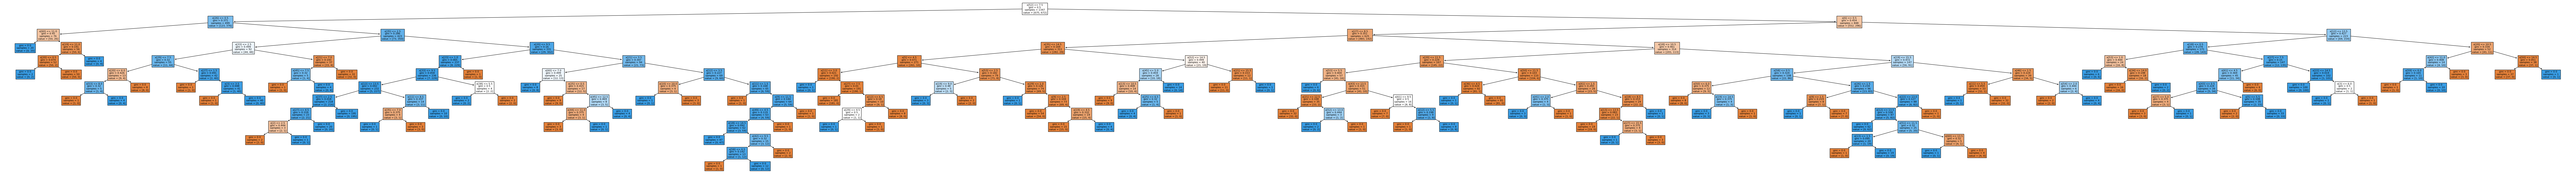

In [15]:
fig = plt.figure(figsize = (150,10))
tree.plot_tree(model1, filled = True)
plt.show()

In [16]:
model1.score(X_train, y_train)

1.0

In [17]:
model1.score(X_test, y_test)

0.8955555555555555

In [18]:
pred1 = model1.predict(X_test)

In [19]:
cf_matrix1 = confusion_matrix(y_test, pred1)

In [20]:
print(cf_matrix1)

[[199  27]
 [ 20 204]]


<Axes: >

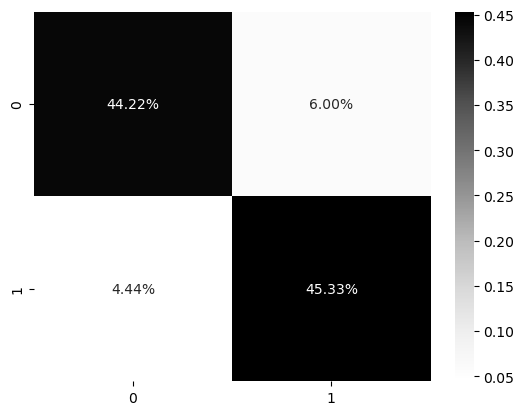

In [21]:
sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='Greys')

# Drzewa o głębokości 5 i 10

In [22]:
model2 = DecisionTreeClassifier(random_state = 17, max_depth = 5)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

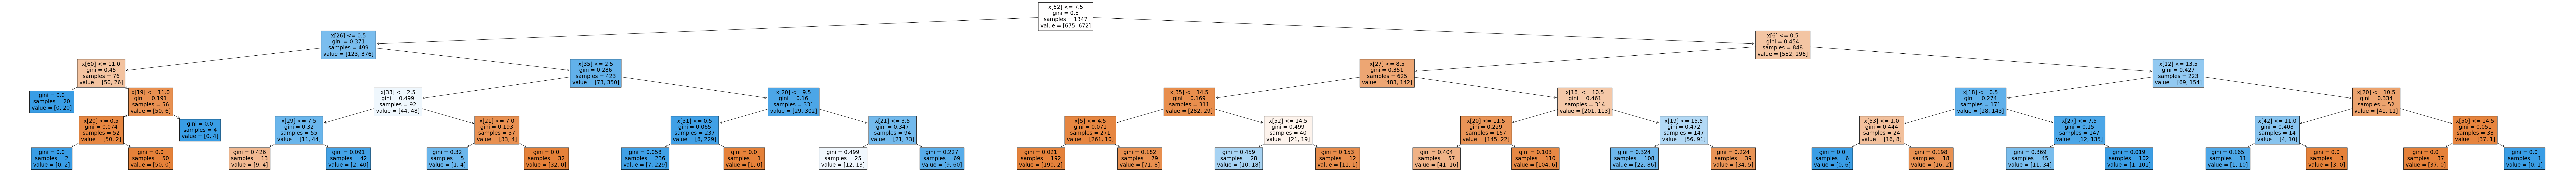

In [23]:
fig = plt.figure(figsize = (150,10))
tree.plot_tree(model2, filled = True)
plt.show()

In [24]:
model2.score(X_train, y_train)

0.910913140311804

In [25]:
model2.score(X_test, y_test)

0.8466666666666667

In [26]:
pred2 = model2.predict(X_test)

In [27]:
cf_matrix2 = confusion_matrix(y_test, pred2)

In [28]:
print(cf_matrix2)

[[183  43]
 [ 26 198]]


<Axes: >

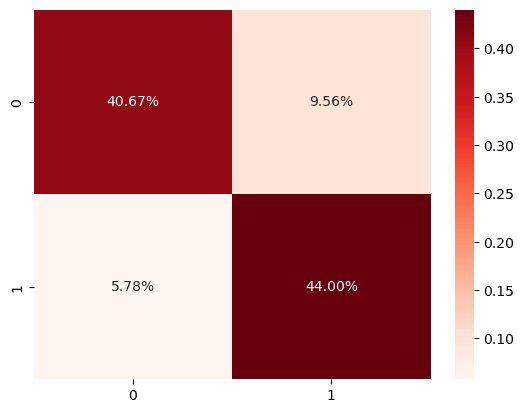

In [29]:
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, 
            fmt='.2%', cmap='Reds')

In [30]:
model3 = DecisionTreeClassifier(random_state = 17, max_depth = 10)
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=17)

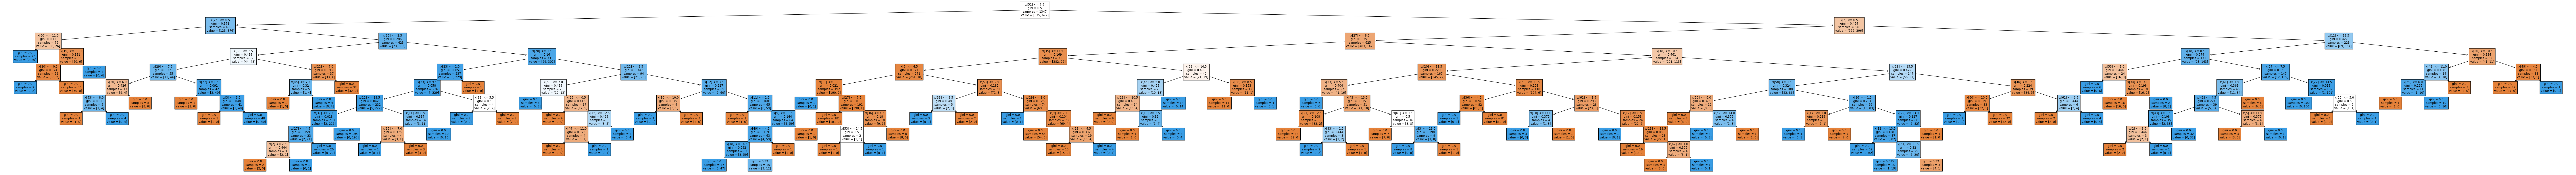

In [31]:
fig = plt.figure(figsize = (150,10))
tree.plot_tree(model3, filled = True)
plt.show()

In [32]:
model3.score(X_train, y_train)

0.9962880475129918

In [33]:
model3.score(X_test, y_test)

0.8911111111111111

In [34]:
pred3 = model3.predict(X_test)

In [59]:
cf_matrix3 = confusion_matrix(y_test, pred3)

In [60]:
print(cf_matrix3)

[[199  27]
 [ 22 202]]


<Axes: >

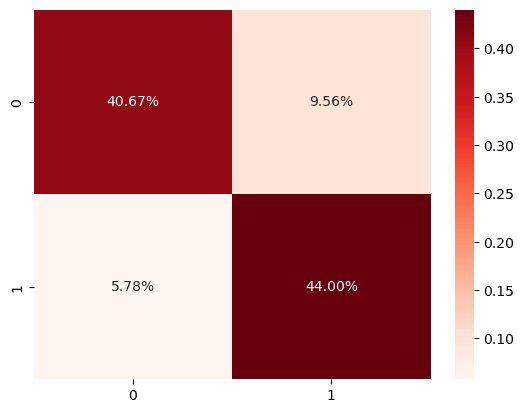

In [37]:
sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True, 
            fmt='.2%', cmap='Reds')

# Lasy Losowe

In [38]:
model4 = RandomForestClassifier(n_estimators = 100, random_state = 17)
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [39]:
model4.score(X_train, y_train)

1.0

In [40]:
model4.score(X_test, y_test)

0.9777777777777777

In [41]:
pred4 = model4.predict(X_test)

In [42]:
cf_matrix4 = confusion_matrix(y_test, pred4)

In [43]:
print(cf_matrix4)

[[223   3]
 [  7 217]]


<Axes: >

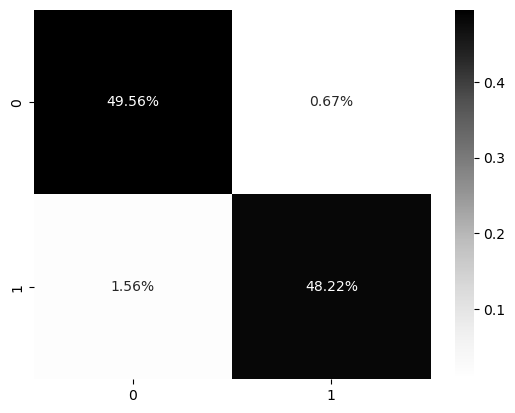

In [44]:
sns.heatmap(cf_matrix4/np.sum(cf_matrix4), annot=True, 
            fmt='.2%', cmap='Greys')

In [45]:
model5 = RandomForestClassifier(n_estimators = 100, random_state = 17, max_depth = 7)
model5.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=17)

In [46]:
model5.score(X_train, y_train)

0.994060876020787

In [47]:
model5.score(X_test, y_test)

0.9666666666666667

In [48]:
pred5 = model5.predict(X_test)

In [49]:
cf_matrix5 = confusion_matrix(y_test, pred5)

In [50]:
print(cf_matrix5)

[[221   5]
 [ 10 214]]


<Axes: >

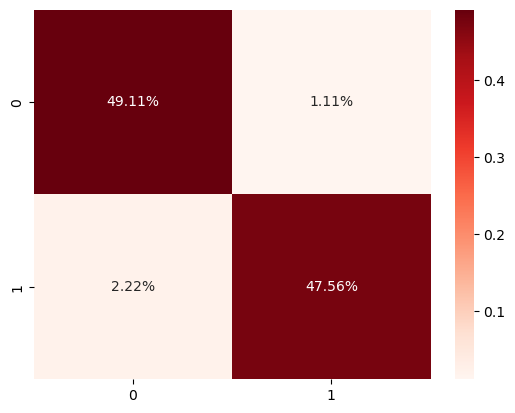

In [51]:
sns.heatmap(cf_matrix5/np.sum(cf_matrix5), annot=True, 
            fmt='.2%', cmap='Reds')

In [52]:
model6 = RandomForestClassifier(n_estimators = 200, random_state = 17)
model6.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=17)

In [53]:
model6.score(X_train, y_train)

1.0

In [54]:
model6.score(X_test, y_test)

0.9777777777777777

In [55]:
pred6 = model6.predict(X_test)

In [56]:
cf_matrix6 = confusion_matrix(y_test, pred6)

In [57]:
print(cf_matrix6)

[[224   2]
 [  8 216]]


<Axes: >

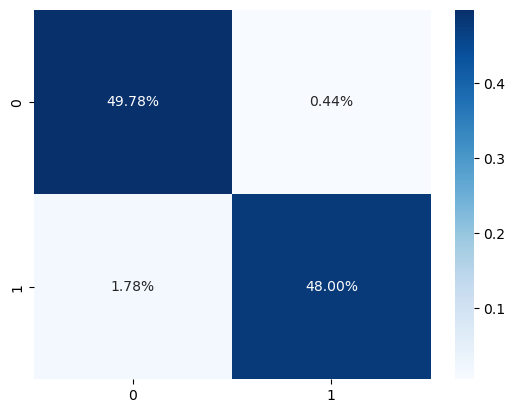

In [58]:
sns.heatmap(cf_matrix6/np.sum(cf_matrix6), annot=True, 
            fmt='.2%', cmap='Blues')

# Precyzja modeli: (TP/(TP+FP))

### model 1 = 0,8805309734513274
### model 2 = 0,8097345132743363
### model 3 = 0,8805309734513274
### model 4 = 0,9867256637168142
### model 5 = 0,9778761061946903
### model 6 = 0,9911504424778761



# model 6 - najlepszy